<html>
    <h1>ECE 445: Machine Learning for Engineers - Albert Tran</h1>
    <h2>Mini Jupyter Exercise #1</h2>
</html>

__Year:__ [ 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010 ]

__GDP:__ [ 1.015, 1.33, 2.29, 3.26, 4.951, 6.759, 9.366, 13.131, 15.599 ]

| Year | GDP (in Trillions) |
| --- | --- |
| 1930 | 1.015 |
| 1940 | 1.33 |
| 1950 | 2.29 |
| 1960 | 3.26 |
| 1970 | 4.951 |
| 1980 | 6.759 |
| 1990 | 9.366 |
| 2000 | 13.131 |
| 2010 | 15.599 |


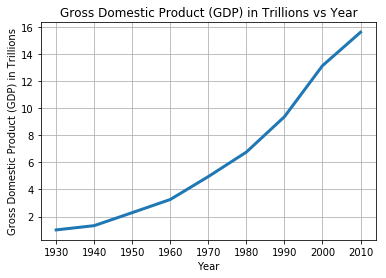

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

years = [1930,1940,1950,1960,1970,1980,1990,2000,2010]

gdp = [1.015,1.33,2.29,3.26,4.951,6.759,9.366,13.131,15.599]

plt.plot(years, gdp, linewidth=3)
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product (GDP) in Trillions')
plt.title('Gross Domestic Product (GDP) in Trillions vs Year')
plt.grid(True)

At first glace, the graph appears to have a positive correlation and one would try to use a linear model to estimate the data. However, a line from the first data point to the last data point would miss many of the other points bewteen. 

Then considering the curve of the graph, a good estimation would be a quadratic model since the curve resembles the right side of a parabola. This is already a good estimation, but if one can note that the data set starts to level off and plateau near the end. This could just be a slight vaiance and the data could continue to rise afterwards, however if the data actually levels off or goes back down, a new model would have to be chosen for the data.

Going with the quadratic model, $ f=x^2 $ , first we apply the horizontal shift in order to move from $ x:[0, 80] $ to $ x:[1930, 2010] $ $ \rightarrow f=(x-1930)^2 $ , 

then add the first data point as a vertical shift: $ f=(x-1930)^2+1.015 $ , 

then add a coefficent to the quadratic in order to elongate the curve horizontally as to fit the last data point: $ f=.00225(x-1930)^2+1.015 $

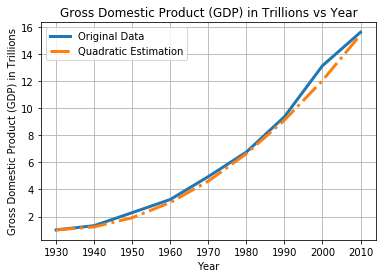

In [2]:
#Original Data
plt.plot(years, gdp, linewidth=3)
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product (GDP) in Trillions')
plt.title('Gross Domestic Product (GDP) in Trillions vs Year')
plt.grid(True)

#New Plot to Estimate
t = np.arange(1930., 2020., 10.)
plt.plot(t, .00225*(t-1930)**2.+1.015, "-.",linewidth=3)

plt.legend(('Original Data', 'Quadratic Estimation'))

The blue line is the same as the previous graph which is the original data, the orange dotted-dashed line is the quadratic model that estimates the data.

<html>
    <h2>Mini Jupyter Exercise #2</h2>
    <p><strong>Objective</strong>: The goal of this exercise is to explore various aspects of principal components analysis (PCA)
using both synthetic data and real data.</p>
    <h3>Synthetic Data</h3>
</html>

In [3]:
from numpy.linalg import matrix_rank

np.random.seed(53) #Same random numbers every time
A = np.random.normal(0,1,(3,2)) #Generate random 3x2 matrix with normal random entries
print("A:", A)
print("\nRank of Matrix A: ", matrix_rank(A))

A: [[ 0.20586487  1.16676171]
 [-2.07263978 -0.63268717]
 [ 0.99712645  2.3945538 ]]

Rank of Matrix A:  2


<html>
    <h4>Generation of Dataset #1</h4>
</html>

In [50]:
x = np.zeros((500,3,1))
np.random.seed(53)
for i in range(500):
    x[i] = np.matrix(A)*np.matrix(np.random.normal(0,1,(2,1))) #x=Av
x = np.matrix(np.transpose(x))
x.shape = (3,500)

print("Dimensionality of Data Matrix X:", x.shape)
print("Dimensionality of Data Sample X[i]:", x[:,0].shape)
print("Rank of X:", matrix_rank(x))

Dimensionality of Data Matrix X: (3, 500)
Dimensionality of Data Sample X[i]: (3, 1)
Rank of X: 2


<html>
    <h4>Singular Value and Eigenvalue Decomposition of Dataset #1</h4>
</html>

In [53]:
x_u, x_sigma, x_v = np.linalg.svd(x, full_matrices = True)#X=U(SIGMA)V
x_lambda, x_q = np.linalg.eig(x*np.matrix(np.transpose(x)))
print(np.square(x_sigma))
print(x_lambda)#FIX THIS

[5.53312162e+03 1.26668331e+03 8.09051082e-30]
[5.53312162e+03 2.54449239e-13 1.26668331e+03]
